以多層感應器(MLP)辨識圖片中數字

什麼是多層感應器？
MLP(Multilayer perceptron)是前向傳輸類神經網路，它包含了三層結構：輸入層、隱藏層以及輸出層
訓練及測試MLP過程為何？

訓練過程：
訓練及資料經過預處理後會產生Features(影像特徵值)以及Label(真實數值)
經過訓練後，訓練完成的模型可以通過測試過程來測試準確度

測試過程：
輸入測試影像，經過預處理後會產生Features，並通過訓練過程所產生的模型來預測此圖片中數字為何。

建立模型

In [1]:
from keras.utils import np_utils #匯入keras.utils因為後續要將label轉換為One-Hot encoding
import numpy as np #匯入numpy模組
np.random.seed(10) #設定seed可以讓每次需要隨機產生的資料，都有相同的輸出

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist #匯入mnist模組

In [3]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data() #讀取mnist資料集

In [4]:
#將原本28X28數字影像，用reshape轉換為784個float數字
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [5]:
#將features(影像特徵值)標準化，可以提高模型預測的準確度，並加快收斂
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [6]:
#使用np_utils.to_categorical將訓練資料與測試資料的label進行One-Hot encoding轉換
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [7]:
#建立模型前須匯入需要用到之模組
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential() #建立一個線性堆疊模型，之後只要使用model.add()方法，即可將神經網路層加入模型中

In [9]:
#通過使用model.add方法，加入Dense神經網路層。Dense神經網路層的特色為所有上一層與下一層的神經元都為完全連結狀態
#units為定義隱藏層神經元數量，input_dim為設定輸入層的神經元個數，kernel_initializer='normal'為使用常態分佈的亂數初始化weight(權重)及bias(偏差值)，activation為定義激活函數為relu
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [10]:
#建立輸出層 共有10個神經元，對應0~9 10個數字，使用softmax激活函數進行轉換，softmax可以將神經元的輸出轉換為預測每一個數字的機率
#units為定義輸出層神經元個數，kernel_initializer='normal'為使用常態分佈的亂數初始化weight(權重)及bias(偏差值)，activation定義激活函數為softmax
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [11]:
print(model.summary()) #此指令可察看模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #訓練模型前，使用compile方法對模型進行設定
#loss 為設定損失函數，在深度學習通常使用cross_entropy交叉墒，訓練效果比較好
#optimizer 為設定訓練時的最優化方法，在深度學習使用adam最優畫方法，可以讓訓練更快收斂並提高準確率
#metrics 為設定評估模型的方式為accuracy準確率

開始訓練模型

In [13]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2) #使用model.fit進行訓練，過程會儲存在train_history變數
#x=x_Train_normalize 為features(影像特徵值)
#y=y_Train_OneHot 為label(影像真實值)
#validation_split=0.2 訓練前keras會自動將資料分成80%訓練資料及20%驗證資料
#epochs=10 為設定執行10次訓練週期
#batch_size=200 設定為每一批次200筆資料
#verbose=2 顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9400
Epoch 2/10
 - 1s - loss: 0.1916 - acc: 0.9450 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/10
 - 1s - loss: 0.1358 - acc: 0.9615 - val_loss: 0.1263 - val_acc: 0.9645
Epoch 4/10
 - 1s - loss: 0.1031 - acc: 0.9704 - val_loss: 0.1125 - val_acc: 0.9678
Epoch 5/10
 - 1s - loss: 0.0812 - acc: 0.9774 - val_loss: 0.0988 - val_acc: 0.9715
Epoch 6/10
 - 1s - loss: 0.0661 - acc: 0.9816 - val_loss: 0.0939 - val_acc: 0.9723
Epoch 7/10
 - 1s - loss: 0.0545 - acc: 0.9849 - val_loss: 0.0911 - val_acc: 0.9735
Epoch 8/10
 - 1s - loss: 0.0457 - acc: 0.9878 - val_loss: 0.0832 - val_acc: 0.9763
Epoch 9/10
 - 1s - loss: 0.0380 - acc: 0.9902 - val_loss: 0.0820 - val_acc: 0.9762
Epoch 10/10
 - 1s - loss: 0.0316 - acc: 0.9919 - val_loss: 0.0801 - val_acc: 0.9766


In [14]:
#使用matplotlib.pyplot顯示訓練過程
import matplotlib.pyplot as plt
%matplotlib inline 
#設定matplotlib在jupyter note網頁內顯示圖形，如果沒使用此指令，會另開視窗顯示圖形
def show_train_history(train_history,train,validation): #train_history為之前訓練過程所產生的train_history，train為訓練資料的執行結果，validation為驗證資料的執行結果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History') #顯示圖的標題
    plt.ylabel(train) #顯示y軸標籤
    plt.xlabel('Epoch') #顯示x軸標籤為Epoch
    plt.legend(['train','validation'],loc = 'upper left') #設定圖利為顯示'train','validation'，位置在左上角
    plt.show()

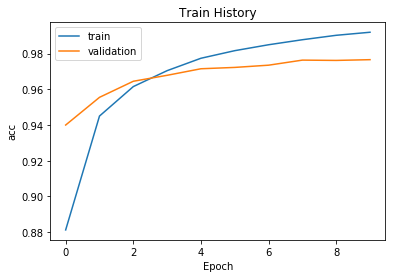

In [15]:
show_train_history(train_history,'acc','val_acc') #畫出accuracy準確率執行結果

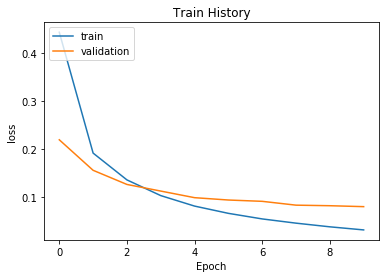

In [16]:
show_train_history(train_history,'loss','val_loss') #畫出loss誤差執行結果

In [17]:
#評估模型準確率
scores = model.evaluate(x_Test_normalize,y_Test_OneHot) #使用model.evaluate進行評估模型準確率，評估後的準確率會儲存在scores
print()
print('accuracy=',scores[1]) #顯示準確率

10000/10000 [==============================] - 1s 60us/step

accuracy= 0.9767


從上面執行結果可看到準確度為0.9765

進行預測測試

In [18]:
prediction=model.predict_classes(x_Test) #使用model.predict_classes輸入操數x_Test(測試資料的數字影像)進行預測，並將結果儲存於prediction變數

In [19]:
prediction #查看預測結果的前10筆資料

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
#建立plot_images_labels_prediction函數
def plot_images_labels_prediction(images, labels, prediction, idx, num=10): #定義函數，並傳入5個參數：images(數字影像)、labels(真實值)、prediction(預測結果)、idx(開始顯示的資料index)及
    fig = plt.gcf() #設定圖形大小                                                                                                                                          num(資料筆數)
    fig.set_size_inches(12, 14)
    if num>25: num=25 #如果資料筆數超過25則設為25，避免出錯
    for i in range(0, num): #定義for迴圈
        ax=plt.subplot(5, 5, 1+i) #建立subfraph子圖形為5行5列
        ax.imshow(images[idx], cmap='binary') #畫出subgraph子圖形
        title= "label=" + str(labels[idx]) #設定子圖形title，顯示標籤欄位
        if len(prediction)>0: #如果有傳入預測結果
            title=title+",prediction="+str(prediction[idx]) #標題title加入預測結果
            
        ax.set_title(title, fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定為不顯示刻度
        idx+=1 #讀取下一筆資料
    plt.show()

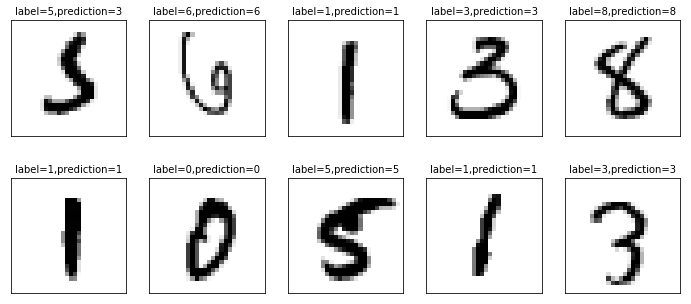

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction, idx=340) #顯示從340~349等10筆資料

使用pandas crosstab建立混淆矩陣(confusion matrix)

In [22]:
import pandas as pd #匯入pandas模組
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict']) 
#y_test_label為測試資料影像的真實值，prediction為測試資料影像的預測結果，rownames為設定行的名稱，colnames則為設定列的名稱

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1012,0,1,0,2,4,7,1
3,0,0,3,992,0,1,0,3,6,5
4,1,0,5,1,960,0,3,0,2,10
5,3,0,0,16,1,854,7,1,7,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,12,7,1,0,0,990,5,8
8,4,0,3,5,1,1,2,2,955,1


上圖對角線是預測正確的數字

In [23]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction}) #建立dataframe(label為真實值，prediction為預測值)
df[:2]

,label,predict
0,7,7
1,2,2


In [24]:
df[(df.label==5)&(df.predict==3)] #顯示真實值是5但預測結果是3的資料(共有17筆，只顯示前10筆)

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


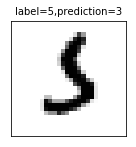

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1) #查看第340筆資料

可看到此數字圖形既像5又像3，因此預測錯誤

參考書籍：
TensorFlow+Keras深度學習人工智慧實務應用-林大貴